In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, os.pardir))
print(f"notebook_dir: {notebook_dir}")
print(f"Calculated project_root: {project_root}")
print(f"Current sys.path (before modification): {sys.path}")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [35]:
import numpy as np

from reflectolearn.math_utils import apply_poisson_noise, get_background_noise
from reflectolearn.processing.fitting import tth2qz_by_energy
from reflectolearn.processing.simulate import make_multifilm


def add_noise(R):
    N = len(R)
    R_poisson = apply_poisson_noise(R, s=10 ** 9)
    # R_poisson = R
    uniform_noise = 1 + np.random.uniform(0.05, 0.1, N)
    background_noise = get_background_noise(N, -10, -6)
    # background_noise = 0
    curve_scaling = np.random.uniform(0.99, 1.01)
    # curve_scaling = 1
    return R_poisson * uniform_noise * curve_scaling + background_noise



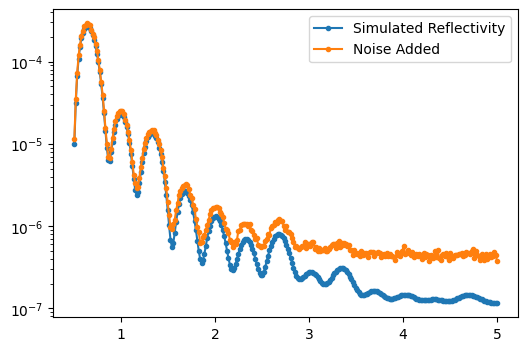

In [41]:
import matplotlib.pyplot as plt

beam_energy = 8.04751
tth = np.linspace(0.5, 5, 300)  # rad
q = tth2qz_by_energy(tth, beam_energy)

# 2층 박막 시뮬레이션 (기판 + 2개 필름)
data = make_multifilm(2, q, add_noise=False)
R = data["R"]
R_noise = add_noise(R)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.semilogy(tth, R, ".-", label="Simulated Reflectivity")
ax.semilogy(tth, R_noise, ".-", label="Noise Added")

plt.legend()
plt.show()

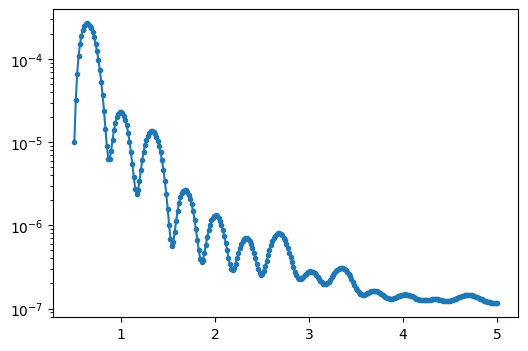

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.semilogy(tth, R, ".-", label="Simulated Reflectivity")